# Analyzing Sharing the Sun Community Solar Project Data through June 2022

This dataset contains project data on community solar installations across the United States interconnected through June 2022. The National Renewable Energy Laboratory (NREL) first released a dataset of community solar projects in 2018, and updates it annually at least. The dataset updated through December 2021 for the first time included a tab of projects with provisions for low- and moderate-income (LMI) subscribers. This dataset includes all projects without indicating LMI provisions. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_excel("Sharing the Sun Community Solar Project Data_through June 2022.xlsx", sheet_name=1)
df.head()

,Project Name,City,State,Utility,Utility Type,System Size (MW-AC),System Size (kW-AC),Year of Interconnection
0,Renewable Energy Park,Ellensburg,WA,City of Ellensburg - (WA),Municipal,0.304000,304.000000,2006
1,Marathon array,Marathon,FL,"Florida Keys El Coop Assn, Inc",Cooperative,0.074308,74.307692,2008
2,Solar Pioneer II,Ashland,OR,City of Ashland - (OR),Municipal,0.048846,48.846154,2008
3,Sol Partners Cooperative Solar Farm,Brighton,CO,"United Power, Inc",Cooperative,0.030769,30.769231,2009
4,Crawl Key array,Marathon,FL,"Florida Keys El Coop Assn, Inc",Cooperative,0.016154,16.153846,2009


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Project Name             2341 non-null   object 
 1   City                     2339 non-null   object 
 2   State                    2341 non-null   object 
 3   Utility                  2341 non-null   object 
 4   Utility Type             2341 non-null   object 
 5   System Size (MW-AC)      2341 non-null   float64
 6   System Size (kW-AC)      2341 non-null   float64
 7   Year of Interconnection  2341 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 146.4+ KB


# Variables

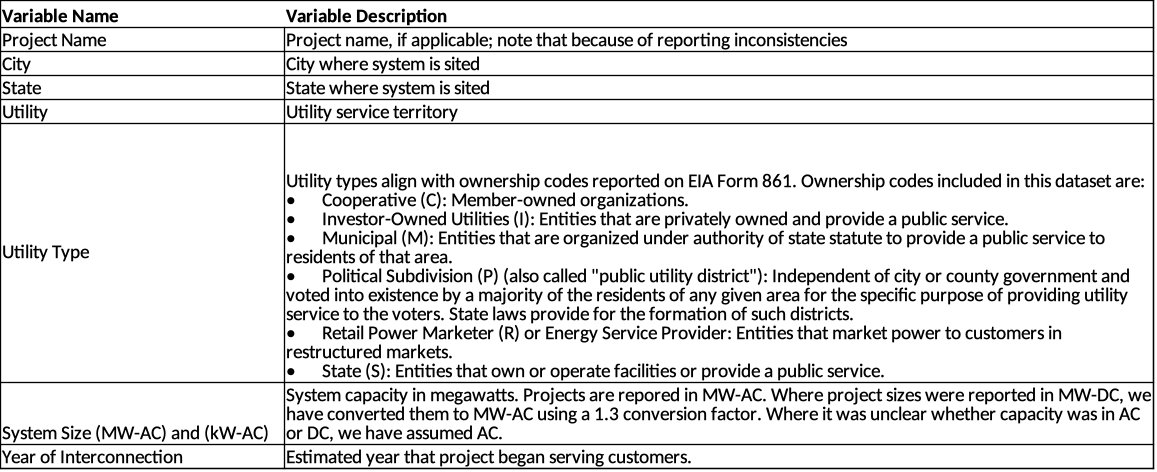


The System Size(MW-AC) and System Size(kW-AC) gives the same information. MW-AC can be discarded in favor of the granularity of kW-AC.

In [16]:
df.drop("System Size (MW-AC)", axis=1, inplace=True)
df.head()

,Project Name,City,State,Utility,Utility Type,System Size (kW-AC),Year of Interconnection
0,Renewable Energy Park,Ellensburg,WA,City of Ellensburg - (WA),Municipal,304.000000,2006
1,Marathon array,Marathon,FL,"Florida Keys El Coop Assn, Inc",Cooperative,74.307692,2008
2,Solar Pioneer II,Ashland,OR,City of Ashland - (OR),Municipal,48.846154,2008
3,Sol Partners Cooperative Solar Farm,Brighton,CO,"United Power, Inc",Cooperative,30.769231,2009
4,Crawl Key array,Marathon,FL,"Florida Keys El Coop Assn, Inc",Cooperative,16.153846,2009


In [27]:
df.drop_duplicates(inplace=True)
df.shape

(2338, 7)

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
System Size (kW-AC),2338.0,2452.240085,9050.659283,2.307692,155.330769,1000.0,2121.980769,228400.0
Year of Interconnection,2338.0,2018.833191,2.320947,2006.000000,2017.000000,2019.0,2021.000000,2022.0


In [30]:
df[["Year of Interconnection"]].astype('object').describe().T

,count,unique,top,freq
Year of Interconnection,2338,16,2021,494


In [29]:
df.describe(include="object").T

,count,unique,top,freq
Project Name,2338,2291,OurSolar,16
City,2336,1002,Brooklyn,124
State,2338,41,NY,717
Utility,2338,309,Northern States Power Co - Minnesota,430
Utility Type,2338,6,Investor Owned,1965


# Statistical Summary
1. The median system size is 1 MW-AC. Most of the solar system is equal or less than 2.1 MW where the largest plant is 228 MW.
2. New York state has the most number of projects among the states with Brooklyn having the most among the cities.
3. Largest numnber of 